# [KDT] ch2 기초 통계

In [1]:
# !pip install seaborn
# !pip install matplotlib
# !pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.__version__

'1.4.4'

## 통계량

In [4]:
# np.arange(10)
array10 = np.arange(10)
array10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# mean
np.mean(array10)

4.5

In [6]:
# array [8,8,8,8,8,8,8,8,8] 
array8 = [8,8,8,8,8,8,8,8,8] 

In [7]:
# np.arange(10)통계량
np.mean(array8)

8.0

In [8]:
# array [8,8,8,8,8,8,8,8,8]  통계량
np.median(array8)
np.var(array8)
np.std(array8)

0.0

In [9]:
# mod
from scipy.stats import mode
mode(array10)

ModeResult(mode=array([0]), count=array([1]))

In [10]:
from scipy.stats import mode
mode(array8)

ModeResult(mode=array([8]), count=array([9]))

In [11]:
# 데이터 값(sclae)이 커질때 평균과 분산의 변화
arr2 = np.arange(10,110,10)
arr2
np.mean(arr2), np.var(arr2), np.std(arr2)

(55.0, 825.0, 28.722813232690143)

In [12]:
# arr2 * 10
arr20 = arr2 * 10
arr20
np.mean(arr20), np.var(arr20), np.std(arr20)

(550.0, 82500.0, 287.22813232690146)

<AxesSubplot:ylabel='Frequency'>

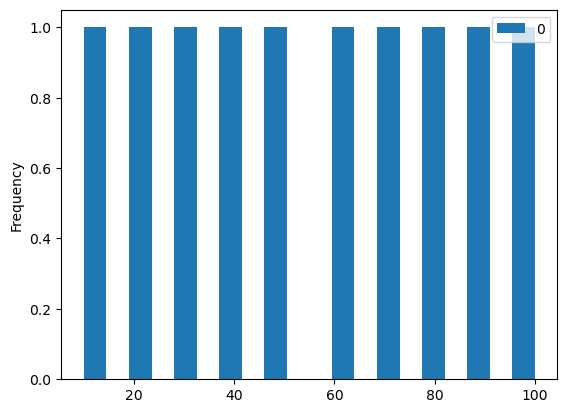

In [13]:
pd.DataFrame(arr2).plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

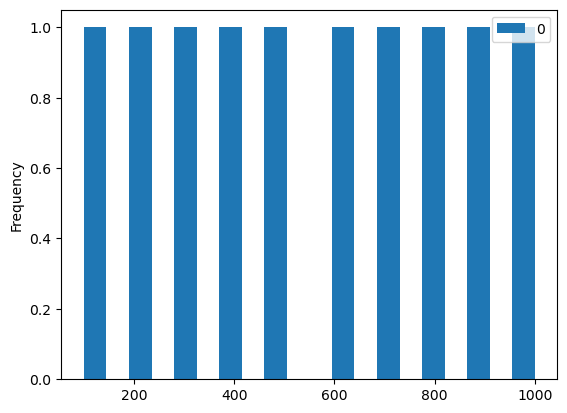

In [14]:
pd.DataFrame(arr20).plot.hist(bins = 20)

## Quiz

data(hk_221206.csv)를 읽고 

1) height column에 대한
- 평균 (mean)
- 중앙값 (mean)
- 최빈값 (mode)
- 1사분위수, 2사분위수, 3사분위수, IQR
- 첨도
- 왜도를 구하시오

2) age column에 대한
- 평균 (mean)
- 중앙값 (mean)
- 최대값 (max)를 구하시오

In [15]:
# 파일 로딩 
df_hk = pd.read_csv('.\data\\hk_221206.csv')
df_hk.head(5)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [16]:
# 변수 type 확인
df_hk.dtypes

name            object
jumin7          object
gender          object
height         float64
age              int64
blood_type      object
company         object
grades          object
salary           int64
expenditure      int64
dtype: object

In [17]:
# 1) height column에 대한 통계량

df_hk['height'].mean()
df_hk['height'].median()
df_hk['height'].mode()  # 수치형 data에는 사용 안함, 주로 명목형 변수에 사용
df_hk['height'].std()
df_hk['height'].var()
df_hk['height'].quantile([0.25, 0.5, 0.75])
df_hk['height'].skew()
df_hk['height'].kurt()

# 명목형 변수 mode 실습
# mode(df_hk['company'])
# df_hk['company'].value_counts()
# df_hk['blood_type'].value_counts()

-1.1083106956455488

In [18]:
# 2) age column에 대한

df_hk['age'].agg(['mean','median', 'max'])

mean      39.24
median    39.00
max       55.00
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

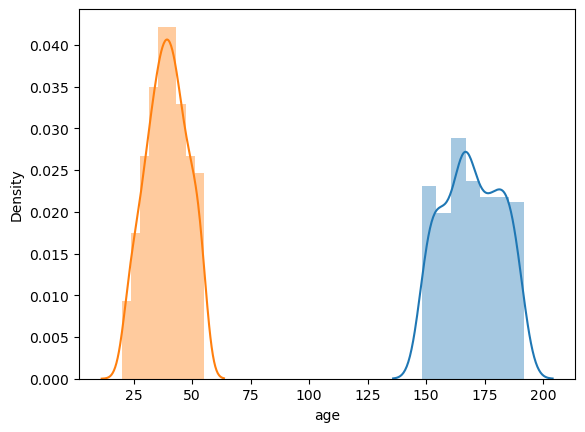

In [19]:
# 그래프 (분포)
sns.distplot(df_hk['height'])
sns.distplot(df_hk['age'])

<AxesSubplot:xlabel='expenditure', ylabel='Density'>

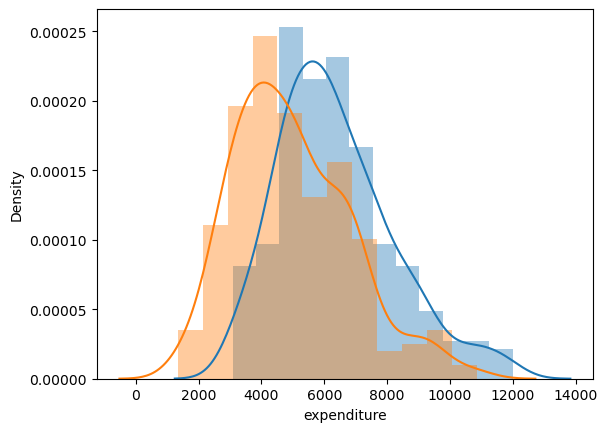

In [20]:
sns.distplot(df_hk['salary'])
sns.distplot(df_hk['expenditure'])

<AxesSubplot:ylabel='height'>

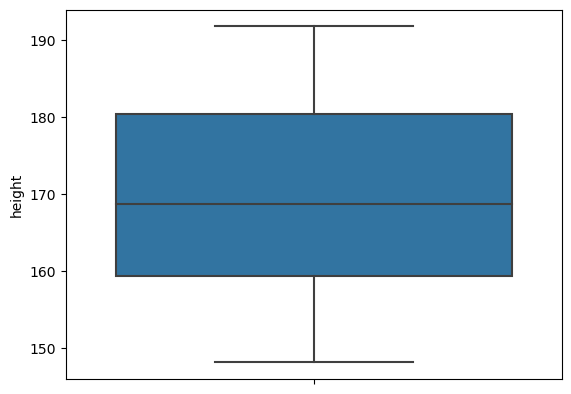

In [21]:
# Grouped boxplots by seaborn
sns.boxplot(y='height', 
            data=df_hk)

<AxesSubplot:xlabel='company', ylabel='height'>

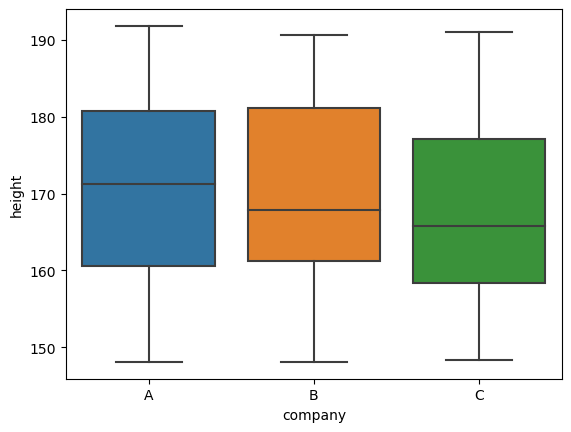

In [22]:
# Grouped boxplots by seaborn
sns.boxplot(x='company', 
            y='height', 
            data=df_hk)

## 조건부확률

df_hk에서 

1) 1명을 선택했을때 Gender 가 Female 이었다. company가 'A'일 확률은 ?

In [23]:
# 파일 로딩
df_hk = pd.read_csv('.\\data\\hk_221015.csv')
df_hk[:5]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


In [24]:
# crosstab 
pd.crosstab(df_hk['gender'], df_hk['company'])

company,A,B,C
gender,,,
F,40,47,25
M,60,53,25


In [25]:
# 조건부 확률
40/(40+47+25)

0.35714285714285715

In [26]:
# random.sample(range(1, 1000),100)

## 중심극한정리

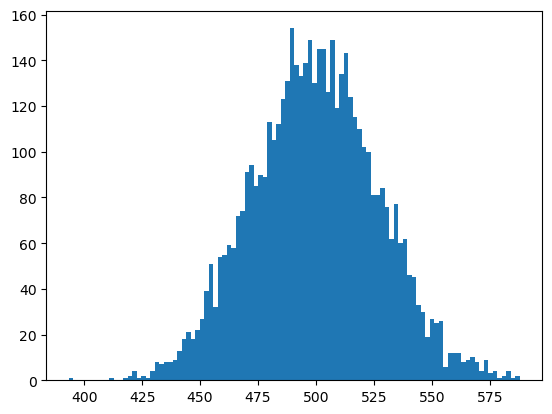

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import random

avg_values = []
for i in range (1,5000): # 횟수를 증가시키면 정규분포로 변화
  random_sample = random.sample(range(1, 1000),100)
  x = np.mean(random_sample)
  avg_values.append(x)

plt.hist(avg_values, bins = 100)
plt.show()

# Chart 기본

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

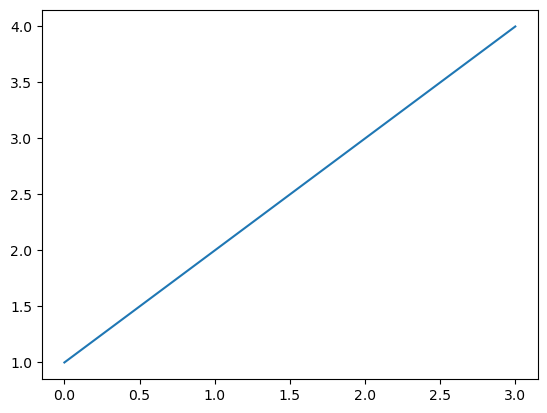

In [29]:
# matplotlib inline

plt.plot([0,1,2,3],[1,2,3,4])
plt.show()

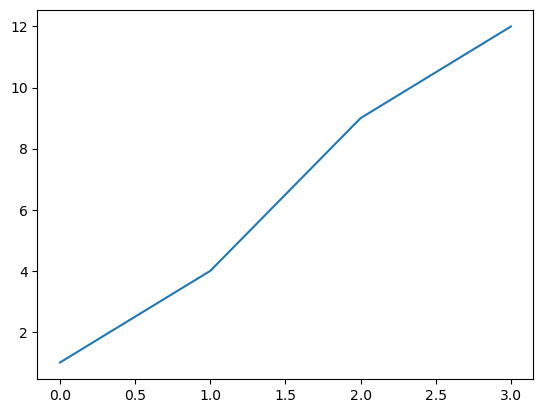

In [30]:
# x, y값 변경
plt.plot([0,1,2,3],[1,4,9,12])
plt.show()

## Figure와 Axes 

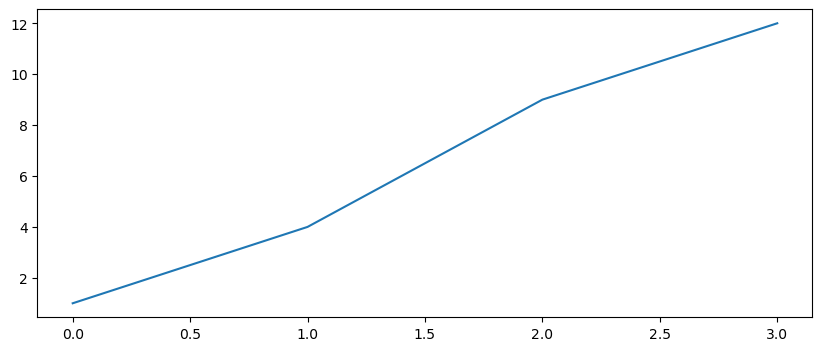

In [31]:
# plt.figure()는 figure의 속성을 정의, figure는 canvas 역할
plt.figure(figsize =(10,4))
plt.plot([0,1,2,3],[1,4,9,12])
plt.show()

<Figure size 1000x400 with 0 Axes>

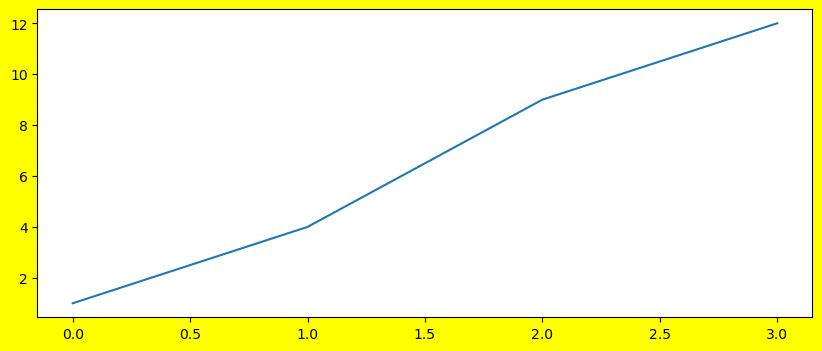

In [32]:
figure = plt.figure(figsize=(10, 4))
plt.figure(figsize =(10,4), facecolor='yellow')
plt.plot([0,1,2,3],[1,4,9,12])
plt.show()

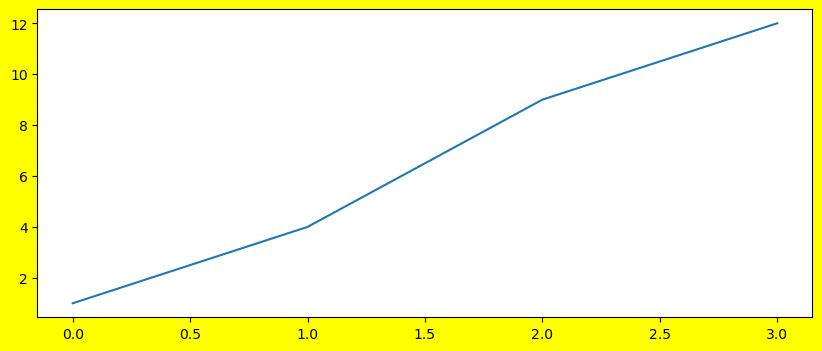

In [33]:
# figure 속성으로 figure 바탕 색상 지정 
plt.figure(figsize =(10,4), facecolor='yellow')
plt.plot([0,1,2,3],[1,4,9,12])
plt.show()

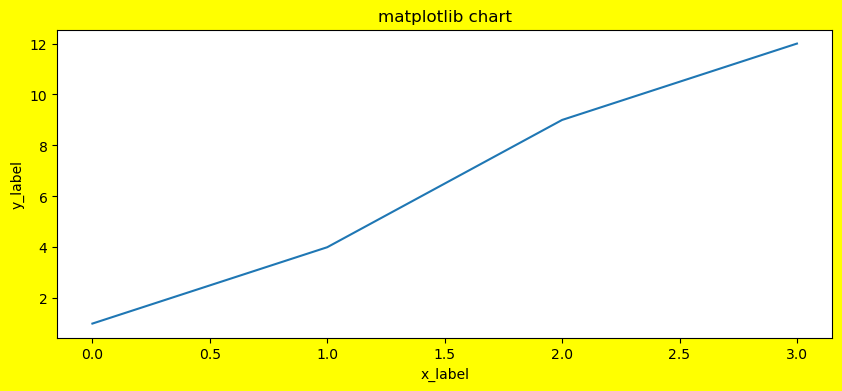

In [34]:
# axes 속성으로 x축, y축 lable, title을 지정
plt.figure(figsize =(10,4), facecolor='yellow')
plt.plot([0,1,2,3],[1,4,9,12])

plt.xlabel('x_label')
plt.ylabel('y_label')
plt.title('matplotlib chart')

plt.show()

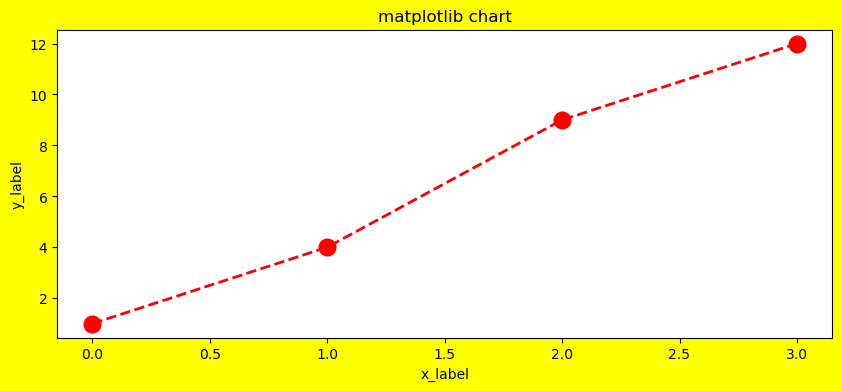

In [35]:
# 다양한 속성 적용이 가능, https://matplotlib.org/stable/api/markers_api.html
plt.figure(figsize =(10,4), facecolor='yellow')
plt.plot([0,1,2,3],[1,4,9,12], color = 'red', marker = 'o' , linestyle = 'dashed', linewidth = 2, markersize = 12)

plt.xlabel('x_label')
plt.ylabel('y_label')
plt.title('matplotlib chart')

plt.show()

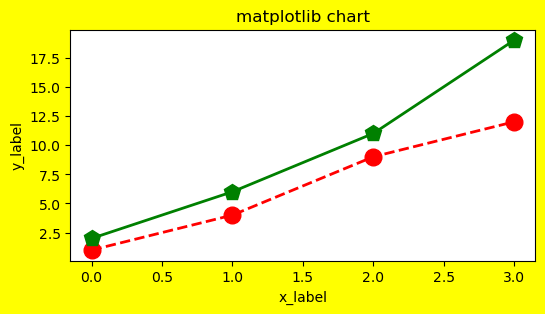

In [36]:
# 범례 적용, 두개 이상의 차트를 한 axes내에 표시
plt.figure(figsize =(6,3), facecolor='yellow')
plt.plot([0,1,2,3],[1,4,9,12], color = 'red', marker = 'o' , linestyle = 'dashed', linewidth = 2, markersize = 12)
plt.plot([0,1,2,3],[2,6,11,19], color = 'green', marker = 'p' , linestyle = 'solid', linewidth = 2, markersize = 12)

plt.xlabel('x_label')
plt.ylabel('y_label')
plt.title('matplotlib chart')

plt.show()

# 14:12분에 시작하겠습니다.


## 시각화 matplotlib, seaborn

In [37]:
# 파일 로딩 
df_hk[:5]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


In [38]:
# Data type을 살펴보고 EDA를 수행 
df_hk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    250 non-null    object 
 1   social_security_number  250 non-null    object 
 2   gender                  250 non-null    object 
 3   height                  250 non-null    float64
 4   age                     250 non-null    int64  
 5   blood_type              250 non-null    object 
 6   company                 250 non-null    object 
 7   grades                  250 non-null    object 
 8   salary                  250 non-null    int64  
 9   expenditure             250 non-null    int64  
 10  car_type                250 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 21.6+ KB


## histogram

* histogram은 연속값에 대한 구간별 도수 분포를 시각화


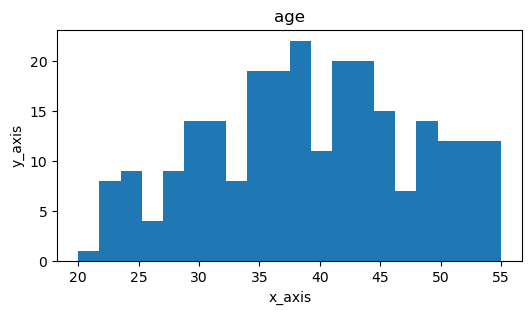

In [39]:
# matplotlib histogram, matplotlib는 x,y축 이름 지정 필요

plt.figure(figsize= (6,3))
plt.hist(x= df_hk['age'], bins = 20)
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('age')
plt.show()

<AxesSubplot:ylabel='Frequency'>

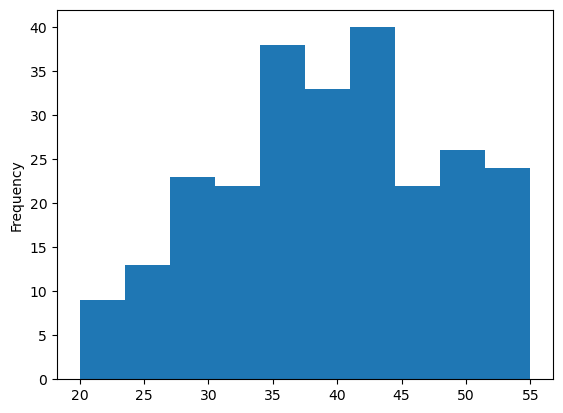

In [40]:
# Pandas 에서도 hist 함수를 바로 호출할 수 있음. 
df_hk['age'].plot.hist(bins=10)


* seaborn의 histogram은 histplot과 displot이 대표적이며 histplot은 axes레벨, displot은 figure레벨임


<AxesSubplot:xlabel='age', ylabel='Count'>

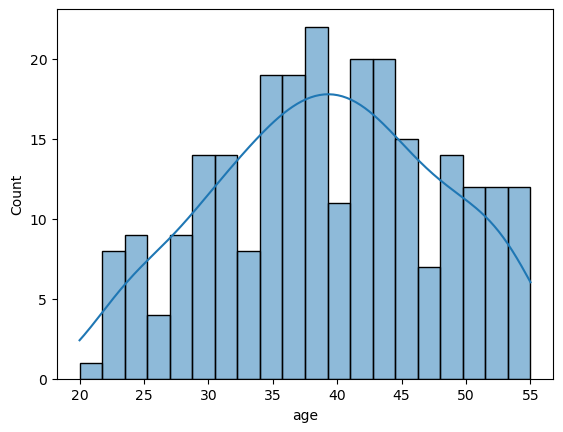

In [41]:
# seaborn histogram histplot
sns.histplot(df_hk['age'], bins = 20, kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

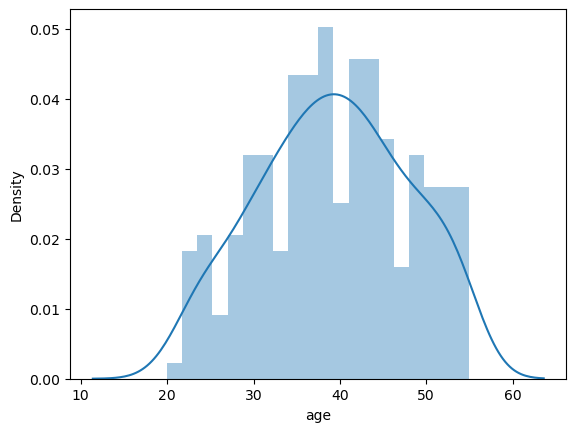

In [42]:
# seaborn histogram distplot
sns.distplot(df_hk['age'], bins = 20)

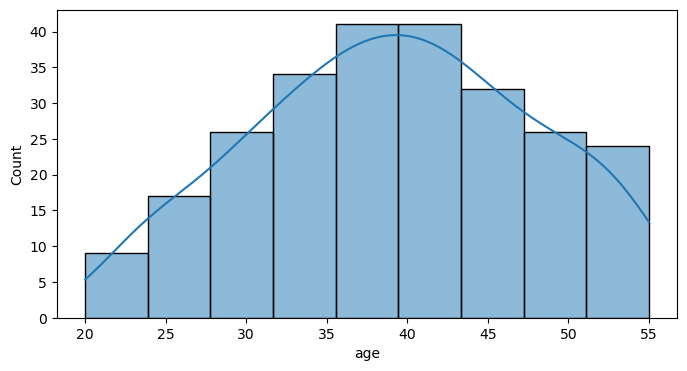

In [43]:
# seaborn histogram canvas의 사이즈 지정

plt.figure(figsize=(8, 4))
sns.histplot(df_hk['age'], kde=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

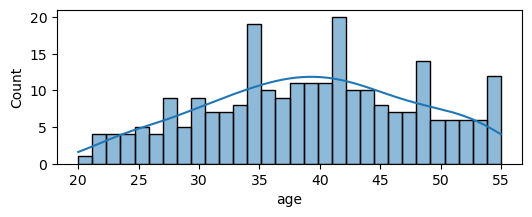

In [44]:
# seaborn histogram bins로 x구간 조정

plt.figure(figsize=(6, 2))
sns.histplot(x='age', data=df_hk, kde=True, bins=30)

## countplot 
* countplot은 범주형에 대한 count 시각화

In [45]:
# 파일 로딩
df_hk[:5]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


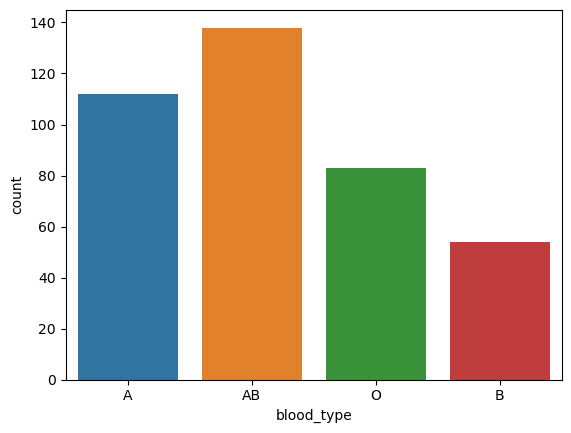

In [46]:
# countplot

sns.countplot(x='gender', data=df_hk)
sns.countplot(x='blood_type', data=df_hk)

plt.show()

## barplot

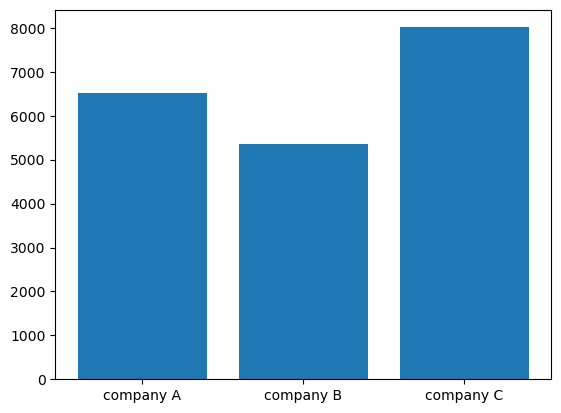

In [47]:
# matplotlib barplot
# bar 값을 만들어야 함

a_mean = df_hk[df_hk['company'] == 'A'].salary.mean()
b_mean = df_hk[df_hk['company'] == 'B'].salary.mean()
c_mean = df_hk[df_hk['company'] == 'C'].salary.mean()
X = df_hk['company'].unique()

plt.bar(x=X, height=[a_mean,b_mean,c_mean])
plt.xticks([0,1,2],['company A','company B','company C']) # plt.xticks([0,1,2] 눈금간격
plt.show()

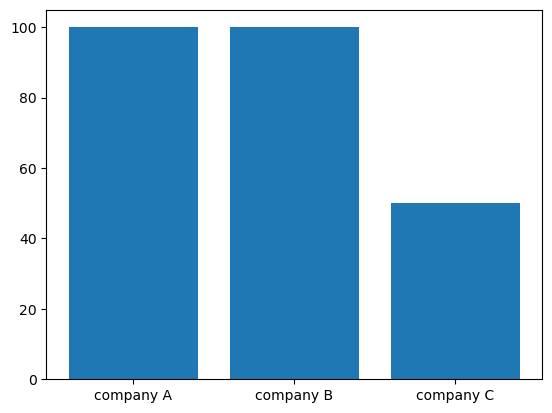

In [48]:
# 개별값 계산

a_count = (df_hk['company'] == 'A').sum()
b_count = (df_hk['company'] == 'B').sum()
c_count = (df_hk['company'] == 'C').sum()

X = df_hk['company'].unique()

plt.bar(x=X, height=[a_count,b_count,c_count])
plt.xticks([0,1,2],['company A','company B','company C'])
plt.show()

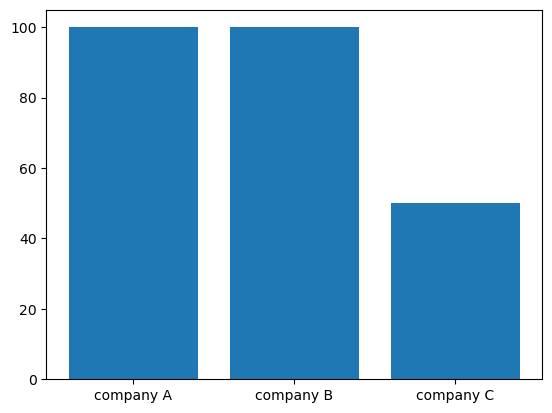

In [49]:
# count_values 사용
count = df_hk['company'].value_counts().tolist()

X = df_hk['company'].unique()
plt.bar(x=X, height=count)
plt.xticks([0,1,2],['company A','company B','company C'])
plt.show()

* seaborn barplot은 범주형에 대한 mean, sum, median 시각화

<AxesSubplot:xlabel='company', ylabel='salary'>

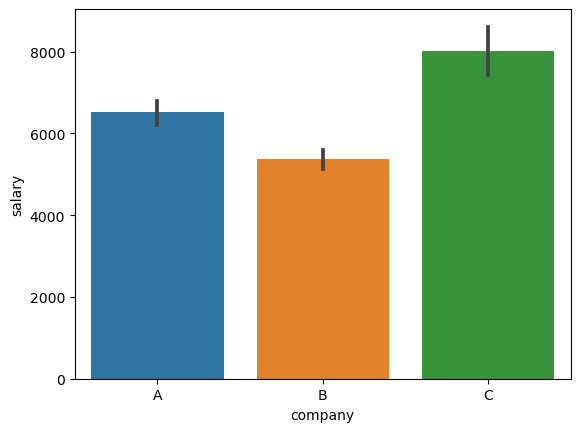

In [50]:
# seaborn barplot y값 default mean으로 계산 (sum, median 변경 가능)
sns.barplot(x = 'company', y = 'salary', data = df_hk)

<AxesSubplot:xlabel='salary', ylabel='company'>

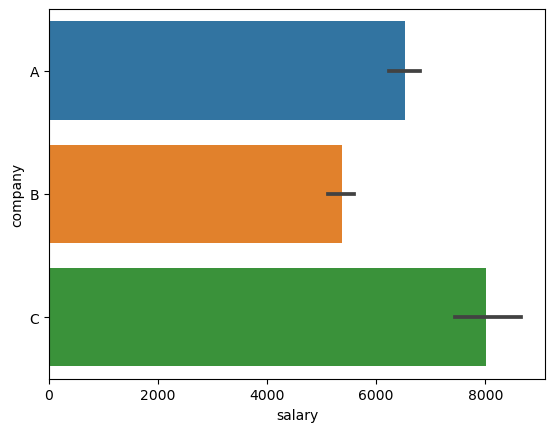

In [51]:
# x, y 변경시 가로형으로 인식하고 출력
sns.barplot(y = 'company', x = 'salary', data = df_hk)

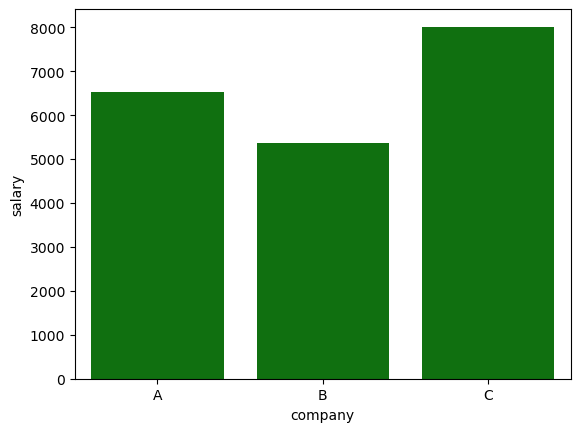

In [52]:
# confidence interval을 없애고, color를 통일.
sns.barplot(x = 'company', y = 'salary', data = df_hk,ci=None, color = 'green' )
plt.show()

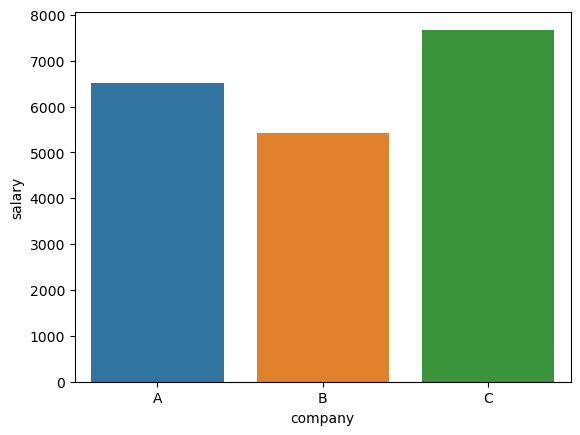

In [53]:
# 평균외에 총합, 중압값으로 표현. estimator= np.median, np.sum
sns.barplot(x = 'company', y = 'salary', data = df_hk,ci=None, estimator=np.median )
plt.show()

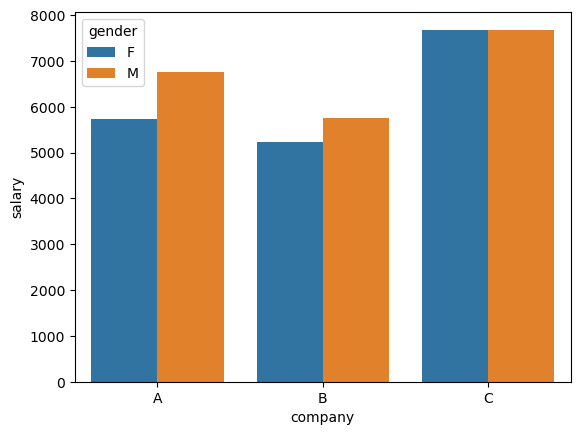

In [54]:
# hue 인자를 사용하여 x값 세분화
sns.barplot(x = 'company', y = 'salary', data = df_hk,ci=None, estimator=np.median, hue= 'gender' )
plt.show()

## box plot
* 4분위를 박스 형태로 **표현**

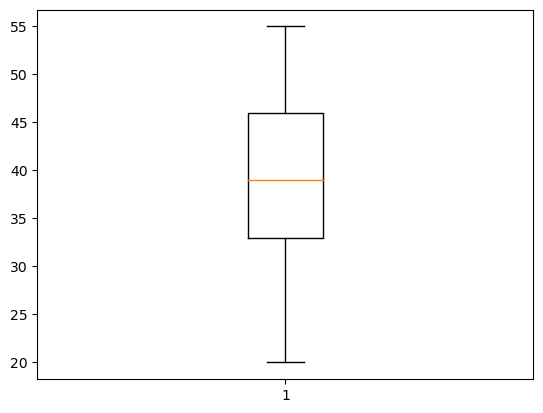

In [55]:
# matplotlib barplot, x(범주형), y(연속형)
plt.boxplot(x = 'age', data = df_hk)
plt.show()

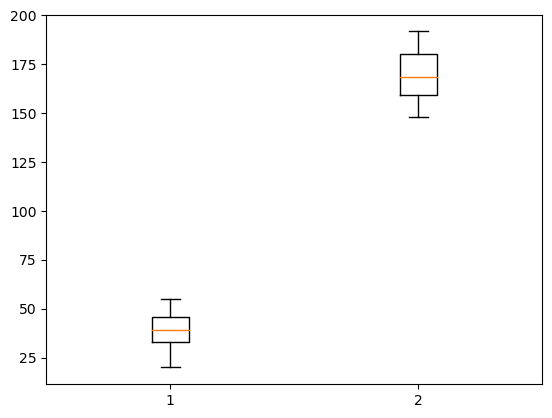

In [56]:
# matplotlib barplot, x(범주형), y(연속형)
plt.boxplot(x = df_hk[['age', 'height']], data = df_hk)
plt.show()

In [57]:
df_hk[df_hk['company'] == 'A']
# df_hk.loc[df_hk['company'] == 'A', :]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
12,hkd11,890419-1,M,188.2,32,B,A,B,4820,3070,m
23,hkd12,881109-2,F,170.2,33,AB,A,A,5080,2955,L
...,...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,L
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,m
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385,m


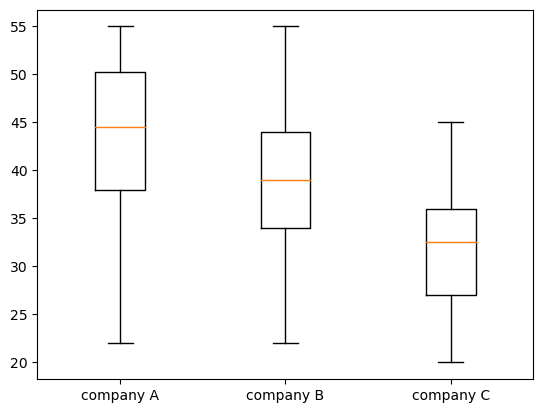

In [58]:
# matplotlib barplot, x(범주형), y(연속형)

a_age = df_hk[df_hk['company'] == 'A'].age
b_age = df_hk[df_hk['company'] == 'B'].age
c_age = df_hk[df_hk['company'] == 'C'].age

plt.boxplot([a_age,b_age,c_age])
plt.xticks(np.arange(1,4),['company A','company B','company C'])
plt.show()


# 13:12에 시작하겠습니다

<AxesSubplot:ylabel='age'>

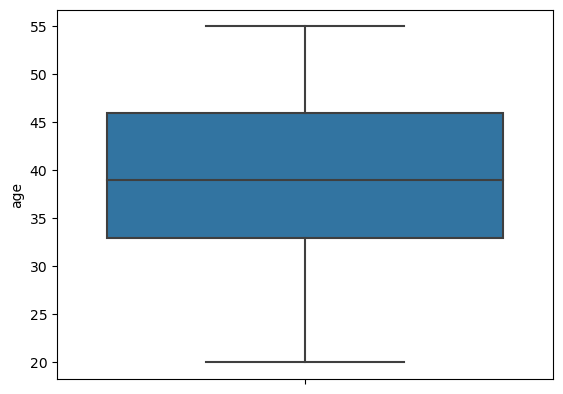

In [59]:
# seaborn boxplot, x(범주형), y(연속형)에 대한 4분위값을 표현
sns.boxplot(y= 'age', data = df_hk)

<AxesSubplot:xlabel='company', ylabel='age'>

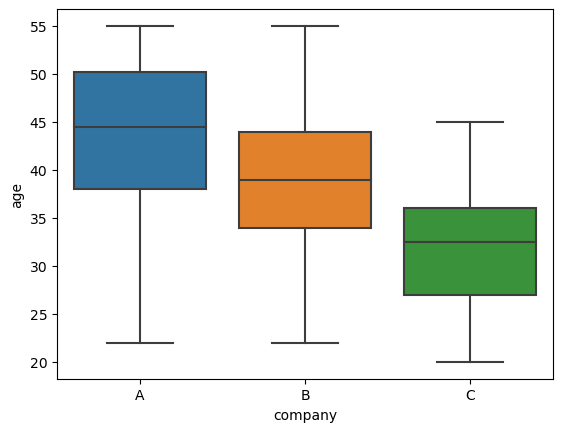

In [60]:
# seaborn boxplot, x(범주형), y(연속형)에 대한 4분위값을 표현
sns.boxplot(x = 'company',  y= 'age', data = df_hk)

<AxesSubplot:xlabel='age', ylabel='company'>

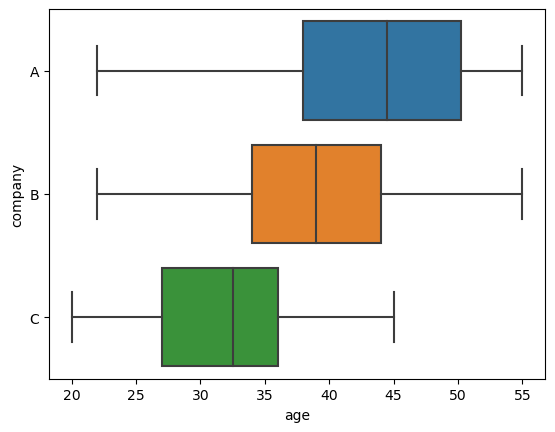

In [61]:
# x(연속형), y(범주형) 입력 data 변경시 가로형으로 인식하고 출력
sns.boxplot(y = 'company',  x= 'age', data = df_hk)

<AxesSubplot:xlabel='company', ylabel='age'>

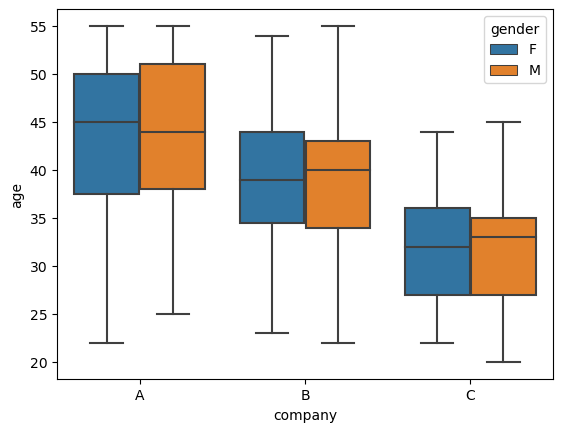

In [62]:
# hue 인자를 사용하여 x값 세분화
sns.boxplot(x = 'company',  y= 'age', data = df_hk, hue= 'gender')

## pie chart
* X(범주형)값을 시각화

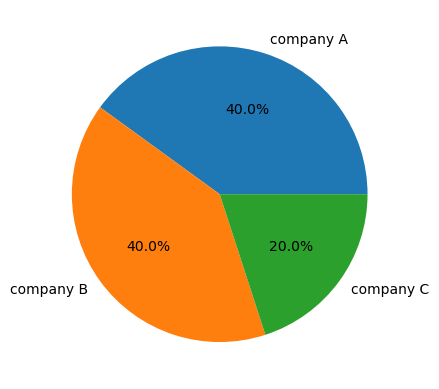

In [63]:
a_count = df_hk[df_hk['company'] == 'A'].company.count()
b_count = df_hk[df_hk['company'] == 'B'].company.count()
c_count = df_hk[df_hk['company'] == 'C'].company.count()

plt.pie(x = ([a_count,b_count,c_count]), 
        labels=(['company A','company B','company C']), autopct='%.1f%%') # autopct 전체 백분율, ' %.2f '는 소숫점 2자리

plt.show()

## scatter plot (산점도)
* 산점도로서 X(연속형), Y(연속형) 값을 시각화

In [64]:
df_hk[:2]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m


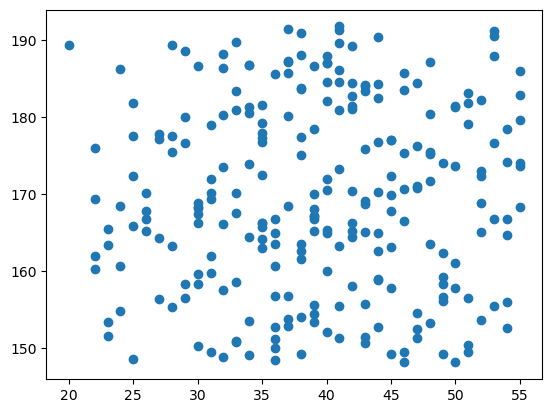

In [65]:
# 교육중 질문, matplotlib scatterplot
# matplotlib scatterplot, <AxesSubplot:xlabel='age', ylabel='height'>
plt.scatter(x= 'age', y='height', data = df_hk)
plt.show()

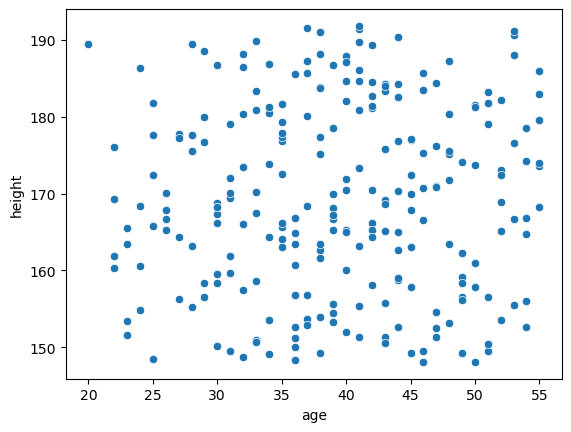

In [66]:
# scatterplot, <AxesSubplot:xlabel='age', ylabel='height'>
sns.scatterplot(x= 'age', y='height', data = df_hk)
plt.show()

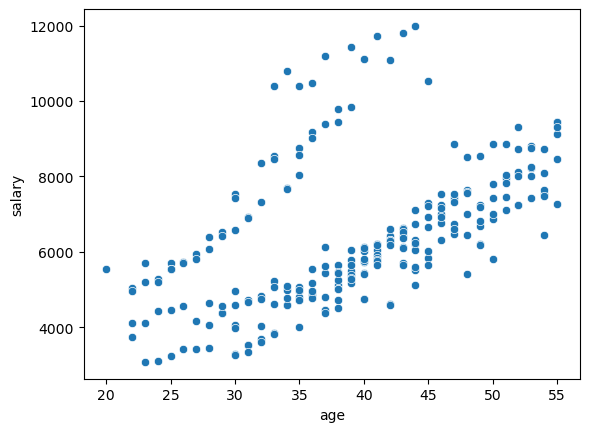

In [67]:
# scatterplot, <AxesSubplot:xlabel='age', ylabel='salary'>
sns.scatterplot(x= 'age', y='salary', data = df_hk)
plt.show()

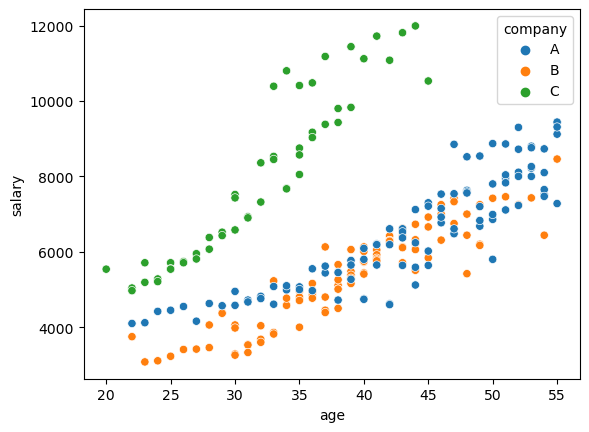

In [68]:
# hue 인자를 사용하여 x값 세분화
sns.scatterplot(x= 'age', y='salary', data = df_hk, hue='company')
plt.show()

## 상관 Heatmap
* 컬럼간의 상관도를 Heatmap형태로 표현

In [69]:
# corr()
df_hk.corr()

,height,age,salary,expenditure
height,1.000000,0.040403,0.048673,0.048044
age,0.040403,1.000000,0.525035,0.552832
salary,0.048673,0.525035,1.000000,0.972185
expenditure,0.048044,0.552832,0.972185,1.000000


<AxesSubplot:>

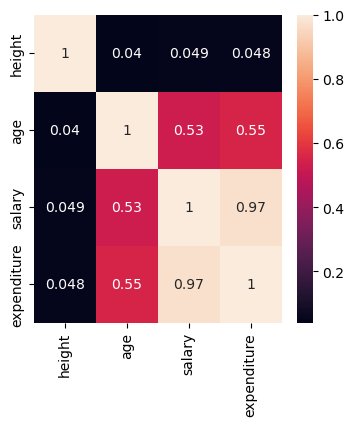

In [70]:
# 상관 Heatmap

plt.figure(figsize=(4, 4))

corr = df_hk.corr()
sns.heatmap(corr, annot= True )

# DataFrame의 corr()은 숫자형 값만 상관도를 구함. 


<AxesSubplot:>

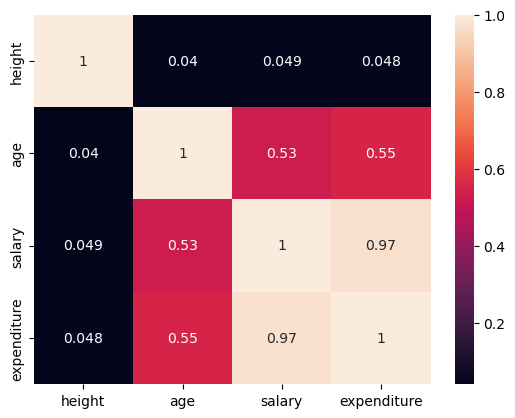

In [71]:
# annotation(주석) 인자로 상관계수 표시
sns.heatmap(corr, annot= True )

## Quiz

1) bike temp에 대한 histogram을 그리시오

2) iris species별 sepal_length 평균의 bar chart를 그리시오

3) diamond cut별 price에 대한 boxplot을 그리시오

4) diamond cut별 price에 대한 scatter plot을 그리시오 (hue = 'color' or 'cut' 적용)

In [72]:
# 파일 로딩 

df_bike = pd.read_csv('.\\data\\bike.csv')
df_iris = pd.read_csv('.\\data\\iris.csv')
df_dia = pd.read_csv('.\\data\\diamonds.csv')

In [73]:
df_bike['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

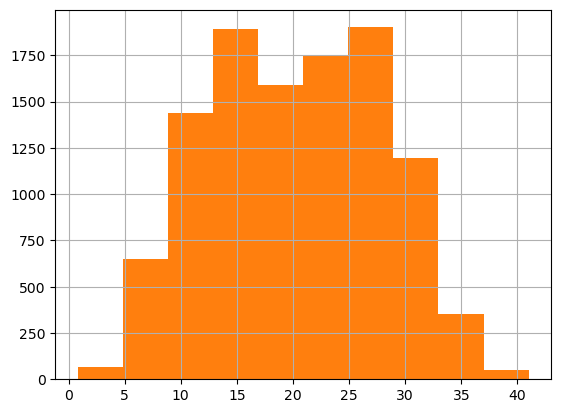

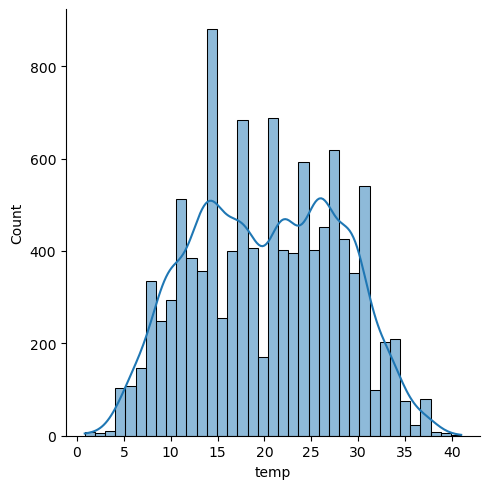

In [74]:
# df_bike['temp'].hist

df_bike['temp'].hist(xlabelsize = 10)
plt.hist(df_bike['temp'])
sns.displot(df_bike['temp'], kde = True)

In [75]:
df_iris[:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [76]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

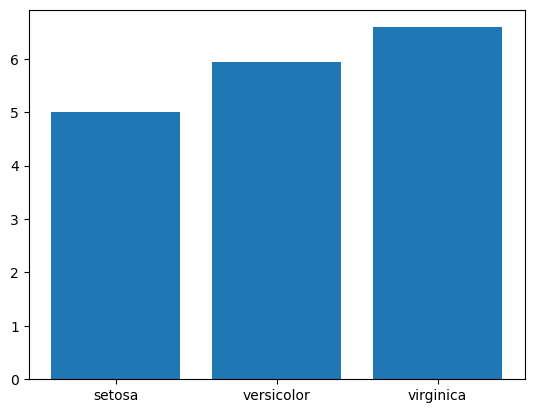

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

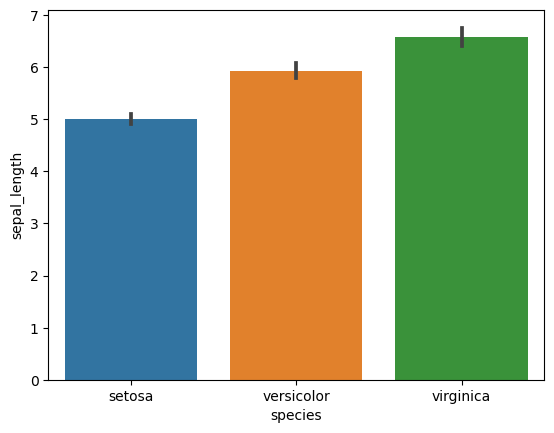

In [77]:
# iris species별 sepal_length 평균의 bar chart

se_mean = df_iris[df_iris['species'] == 'setosa'].sepal_length.mean()
ve_mean = df_iris[df_iris['species'] == 'versicolor'].sepal_length.mean()
vi_mean = df_iris[df_iris['species'] == 'virginica'].sepal_length.mean()
X = df_iris['species'].unique()
       
plt.bar(x=X, height=[se_mean, ve_mean, vi_mean])
plt.xticks([0,1,2],['setosa','versicolor','virginica'])
plt.show()
            
sns.barplot(x='species', y='sepal_length', data=df_iris)

In [78]:
df_dia['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

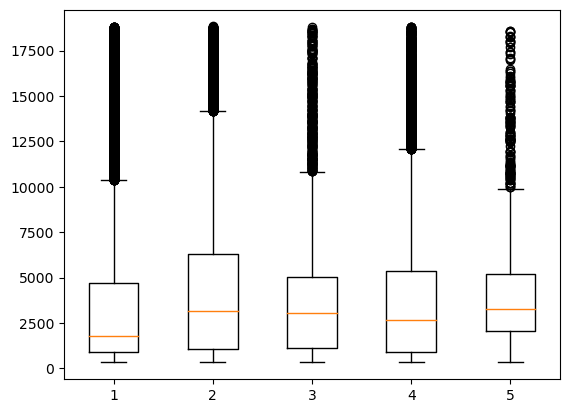

<AxesSubplot:xlabel='cut', ylabel='price'>

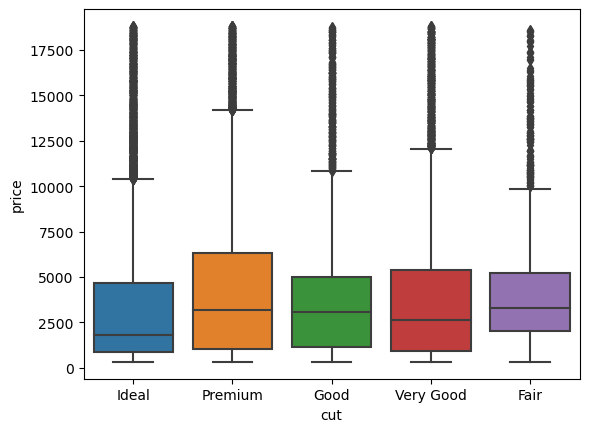

In [79]:
# diamond cut별 price에 대한 boxplot

i_price = df_dia[df_dia['cut'] == 'Ideal'].price
p_price = df_dia[df_dia['cut'] == 'Premium'].price
g_price = df_dia[df_dia['cut'] == 'Good'].price
v_price = df_dia[df_dia['cut'] == 'Very Good'].price
f_price = df_dia[df_dia['cut'] == 'Fair'].price

plt.boxplot([i_price, p_price, g_price, v_price, f_price])
plt.show()
            
sns.boxplot(x='cut', y='price', data=df_dia)

In [80]:
df_dia.groupby('cut').price.min().reset_index()

,cut,price
0,Fair,337
1,Good,327
2,Ideal,326
3,Premium,326
4,Very Good,336


<AxesSubplot:xlabel='carat', ylabel='price'>

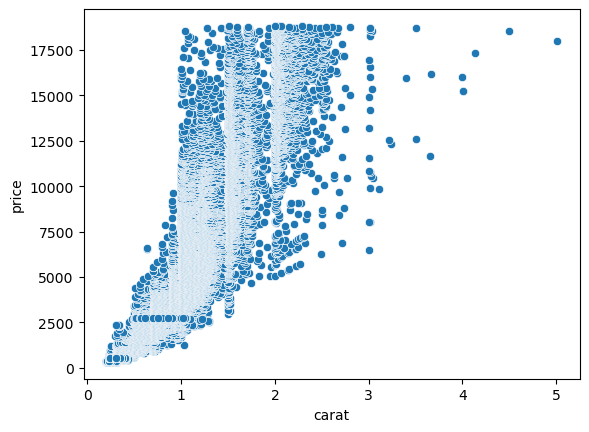

In [81]:
# diamond cut별 price에 대한 scatter plot
           
sns.scatterplot(x='carat', y='price', data=df_dia)

<AxesSubplot:xlabel='carat', ylabel='price'>

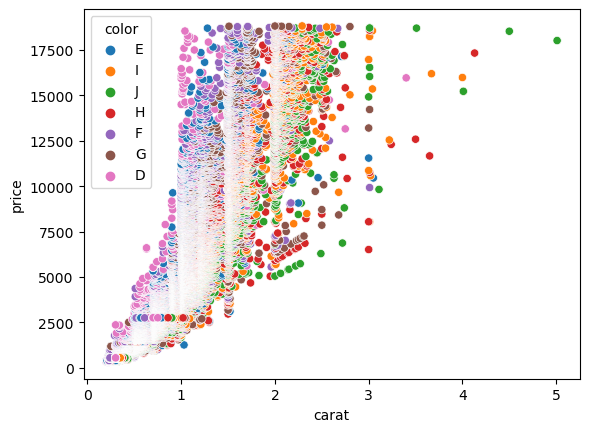

In [82]:
sns.scatterplot(x='carat', y='price', data=df_dia, hue = 'color')

<AxesSubplot:xlabel='carat', ylabel='price'>

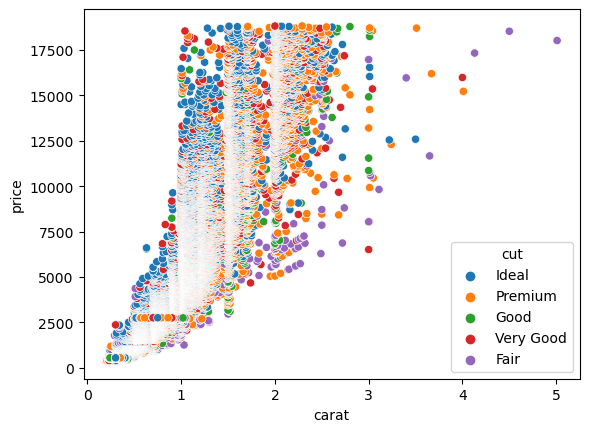

In [83]:
sns.scatterplot(x='carat', y='price', data=df_dia, hue = 'cut')

<AxesSubplot:xlabel='carat', ylabel='price'>

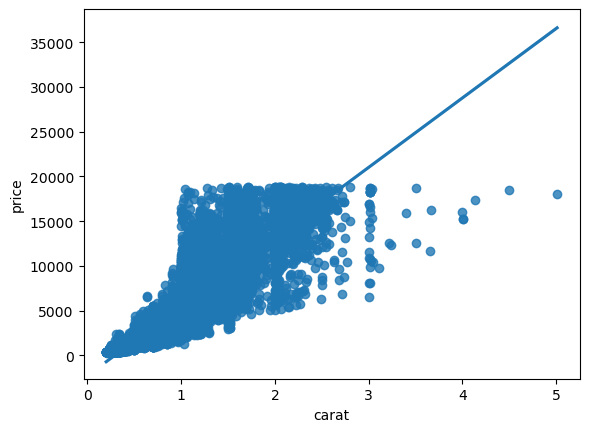

In [84]:
# 선형회귀 그래프, regplot: scatter plot, regression line, confidence band를 한 번에 그리는 기능
sns.regplot(x='carat', y='price', data=df_dia)